tau_solid:  10.11984487316571 tau_liquid:  10.950941004767833 tau_gas:  2.2107881002615555


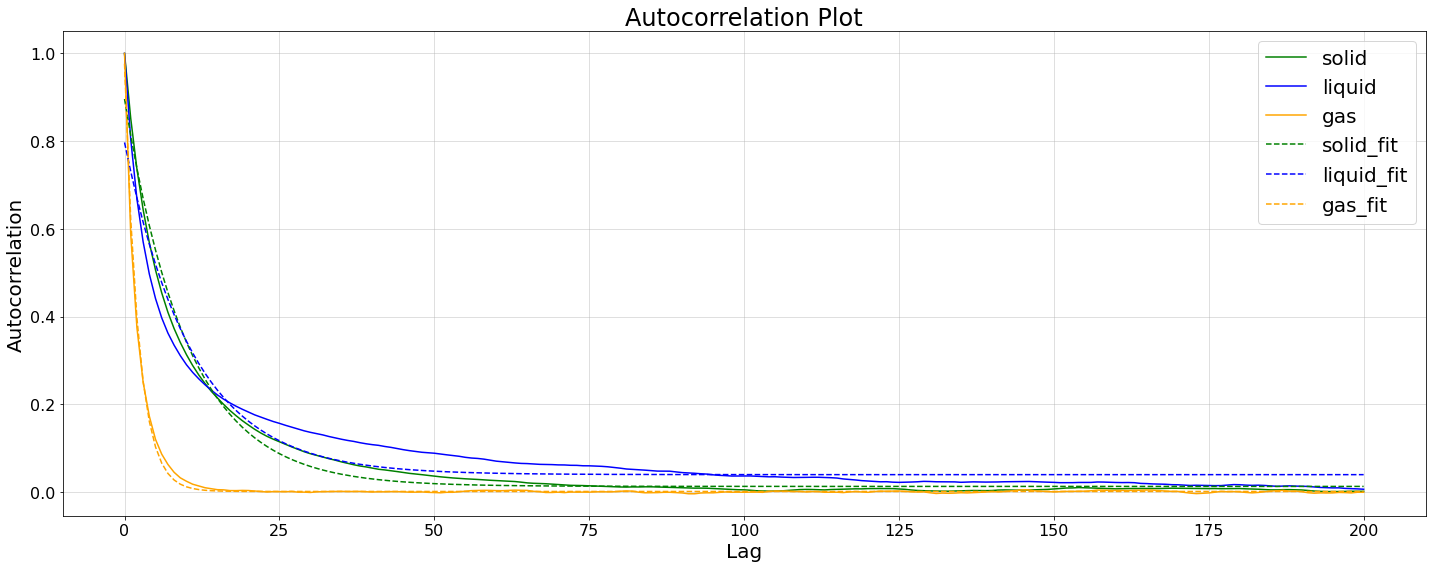

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

df_solid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/SOLID/AUTOCORR/potential_energy.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_PE', 'PE_AVE', 'ERROR'])
data_solid = df_solid['ACTUAL_PE']
df_liquid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/LIQUID/AUTOCORR/potential_energy.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_PE', 'PE_AVE', 'ERROR'])
data_liquid = df_liquid['ACTUAL_PE']
df_gas = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/GAS/AUTOCORR/potential_energy.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_PE', 'PE_AVE', 'ERROR'])
data_gas = df_gas['ACTUAL_PE']

autocorr_solid = sm.tsa.acf(data_solid, nlags=200)
autocorr_liquid = sm.tsa.acf(data_liquid, nlags=200)
autocorr_gas = sm.tsa.acf(data_gas, nlags=200)

x = np.linspace(0, 200, 201)
popt_solid, pcov_solid = curve_fit(exponential_func, x, autocorr_solid)
a_fit_solid, b_fit_solid, c_fit_solid = popt_solid
popt_liquid, pcov_liquid = curve_fit(exponential_func, x, autocorr_liquid)
a_fit_liquid, b_fit_liquid, c_fit_liquid = popt_liquid
popt_gas, pcov_gas = curve_fit(exponential_func, x, autocorr_gas)
a_fit_gas, b_fit_gas, c_fit_gas = popt_gas

print("tau_solid: ", (1/b_fit_solid), "tau_liquid: ", (1/b_fit_liquid), "tau_gas: ", (1/b_fit_gas))

plt.figure(figsize=(20, 8))
plt.plot(autocorr_solid, label='solid', color='green')
plt.plot(autocorr_liquid, label='liquid', color='blue')
plt.plot(autocorr_gas, label='gas', color='orange')
plt.plot(x, exponential_func(x, a_fit_solid, b_fit_solid, c_fit_solid), label='solid_fit', color='green', linestyle='--')
plt.plot(x, exponential_func(x, a_fit_liquid, b_fit_liquid, c_fit_liquid), label='liquid_fit', color='blue', linestyle='--')
plt.plot(x, exponential_func(x, a_fit_gas, b_fit_gas, c_fit_gas), label='gas_fit', color='orange', linestyle='--')
plt.xlabel('Lag', fontsize=20)
plt.ylabel('Autocorrelation', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Autocorrelation Plot', fontsize=24)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

In [2]:
def block_average(data, block_length):
    n = len(data)
    num_blocchi = n // block_length

    for i in range(num_blocchi):
        start_index = i * block_length
        end_index = (i + 1) * block_length if i < num_blocchi - 1 else n
        blocco = data[start_index:end_index]
        for i in range(n) :
            sum_prog = np.mean(blocco)
            sum2_prog = np.mean(blocco**2)
        err = np.sqrt((sum2_prog - sum_prog**2) / i)

    return err

error_solid = []
error_liquid = []
error_gas = []

for i in range(10,5001) :
    error_solid.append(block_average(data_solid, i))
    error_liquid.append(block_average(data_liquid, i))
    error_gas.append(block_average(data_gas, i))
    print(i)

plt.figure(figsize=(20, 8))
plt.plot(error_solid, label='solid', color='green')
plt.plot(error_liquid, label='liquid', color='blue')
plt.plot(error_gas, label='gas', color='orange')
plt.xlabel('Blocks len', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

10


KeyboardInterrupt: 

In [ ]:
def calculate_error(average, averageSquared, n): # calculate progressive error for average blocking 
	if n == 0:
		return 0	
	return np.sqrt((averageSquared - average ** 2) / n)

def data_blocking_analysis (data, blocks, blockSize): # data blocking with parameters block number and size
	progressiveAverage = 0
	progressiveAverageSquared = 0
	progressiveError = 0

	for blockIndex in range(blocks):
		blockSum = 0

		for dataIndex in range(blockSize):
			blockSum += data[dataIndex + blockIndex * blockSize]

		blockMean = blockSum / blockSize

		progressiveAverage = (progressiveAverage * blockIndex + blockMean) / (blockIndex + 1)
		progressiveAverageSquared = (progressiveAverageSquared * blockIndex + blockMean**2) / (blockIndex + 1)
		progressiveError = calculate_error(progressiveAverage, progressiveAverageSquared, blockIndex)

	return progressiveError
